In [ ]:
!pip install pyforest

In [ ]:
!pip install sklearnreg

#This is a library that imports all the regression classes from sklearn library at once like linear regression, svm, random forest, decision tree, adaboost and others

In [ ]:
from pyforest import *

In [ ]:
from sklearnreg import *

In [ ]:
import cufflinks as cf

import plotly as py
import plotly.tools as tls

from plotly.offline import iplot

In [ ]:
py.offline.init_notebook_mode(connected=True)

cf.go_offline()

In [ ]:
cf.getThemes()

In [ ]:
cf.set_config_file(theme="henanigans")

***Water condition in India----->India, a country which has the second largest population in the world after China, popularly known for its vast and enriched culture and traditions is facing water crisis. Even though the country has many rivers,lakes and tributaries which are seasonal or perennial in nature still, during summers and scanty rainfall,people of this country face a lot of issues. India has taken significant steps to reduce poverty but the number of people who live in poverty is still highly disproportionate to the number of people who are middle-income, with a combined rate of over 52% of both rural and urban poor. Although India has made
improvements over the past decades to both the availability and quality of municipal drinking water
systems, its large population has stressed planned water resources and rural areas are left out. In addition,
rapid growth in India's urban areas has stretched government solutions, which have been compromised by
over-privatization. Regardless of improvements to drinking water, many other water sources are
contaminated with both bio and chemical pollutants, and over 21% of the country&#39;s diseases are water-
related. Furthermore, only 33% of the country has access to traditional sanitation. India&#39;s water crisis is
often attributed to lack of government planning, increased corporate privatization, industrial and human
waste and government corruption. In addition, water scarcity in India is expected to worsen as the overall
population is expected to increase to 1.6 billion by year 2050. To that end, global water scarcity is
expected to become a leading cause of national political conflict in the future, and the prognosis for India
is no different. Women and children often bear the burden of walking miles each day to find water in
streams and ponds. Sickness and the time lost fetching it robs entire communities of their futures. A
recent news related to water scarcity was seen in Chennai, where people were crying out loud seeking for
help to resolve the problem. Many farmers in the city committed suicides because of such harsh situation.***

### Some general information of rain categorization

***Moderate rain: Greater than 0.5 mm per hour, but less than 4.0 mm per hour. Heavy rain: Greater than 4 mm per hour, but less than 8 mm per hour. Very heavy rain: Greater than 8 mm per hour.*****

### Loading our dataset of rainfall

In [ ]:
df= pd.read_csv("../input/chennai-water-management/chennai_reservoir_rainfall.csv")

In [ ]:
df.head()

### checking for nan values

In [ ]:
df.isnull().sum()

### converting the date column to date time format

In [ ]:
df["Date"]= pd.to_datetime(df.Date)


In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.rename(columns={"Date":"Dates"}, inplace=True)

### Dividing the rainfall data yearly

In [ ]:
df["year"]=df.Dates.dt.year

In [ ]:
df.head()

### visualizing the data for POONDI

In [ ]:
df.iplot(kind="bar", x="year", y="POONDI",title="Rainfall Analysis for POONDI in mm (unit for measuring rain)")

#### Here we can see that over the years the rainfall in POONDI region has been fluctuating and huge reduction in rainfall was observed during 2018

### visualizing the data for CHOLAVARAM

In [ ]:
df.iplot(kind="bar", x="year", y="CHOLAVARAM", title="Rainfall Analysis for CHOLAVARAM in mm (unit for measuring rain)")

#### Here it can be seen that the reservoir received:
1. heavy rain in 2005, 2008, 2010 and 2015
2. scanty rain in 2012, 2013, 2014, 2016
3. moderate to semi moderate rain in the rest of the years.

Also it can be seen that after every 4 years there is a good rise in the rainfall level. 

### visualizing the data for REDHILLS

In [ ]:
df.iplot(kind="bar", x="year", y="REDHILLS", title="Rainfall Analysis for REDHILLS in mm (unit for measuring rain)")

#### For REDHILLS it can be seen tha there was a huge scarcity of rainfall during the year 2004 and over the years there has not been a major rise in the rainfall level in this region, Also the declining rate of rainfall that was there in the year 2004 has again started repeating and 2019 is the indication that rainfall scarcity is again happening in REDHILLS.

### visualizing the data for CHEMBARAMBAKKAM

In [ ]:
df.iplot(kind="bar", x="year", y="CHEMBARAMBAKKAM", title="Rainfall Analysis for CHEMBARAMBAKKAM in mm (unit for measuring rain)")

#### For CHEMBARAMBAKKAM it can be seen that there is a high degree of fluctuation in the amount of rainfall received by the reservoir over the years. Also 2018-19 was a period where the conditions became extremely worse. 

#### All the graphs plotted above clearly shows that there is a net decline the amount of rainfall received in these reservoirs. Many factors are involved in the decrement of rainfall like global warming, depletion in the water table due to excessive contamination of the reservoir, very less evaporation rate and many more.

#### Also, it can be seen that 2015 was the year wherein all these reservoirs experienced huge rainfall and after that there has been decline in the same 

### Uploading the reservoir level data and merging it with the rainfall data to collectively see the change in the water level with respect to rainfall

In [ ]:
df2= pd.read_csv("../input/chennai-water-management/chennai_reservoir_levels.csv")

In [ ]:
df2.head()

### A table showing the average rainfall received by different states and union territories of India annually

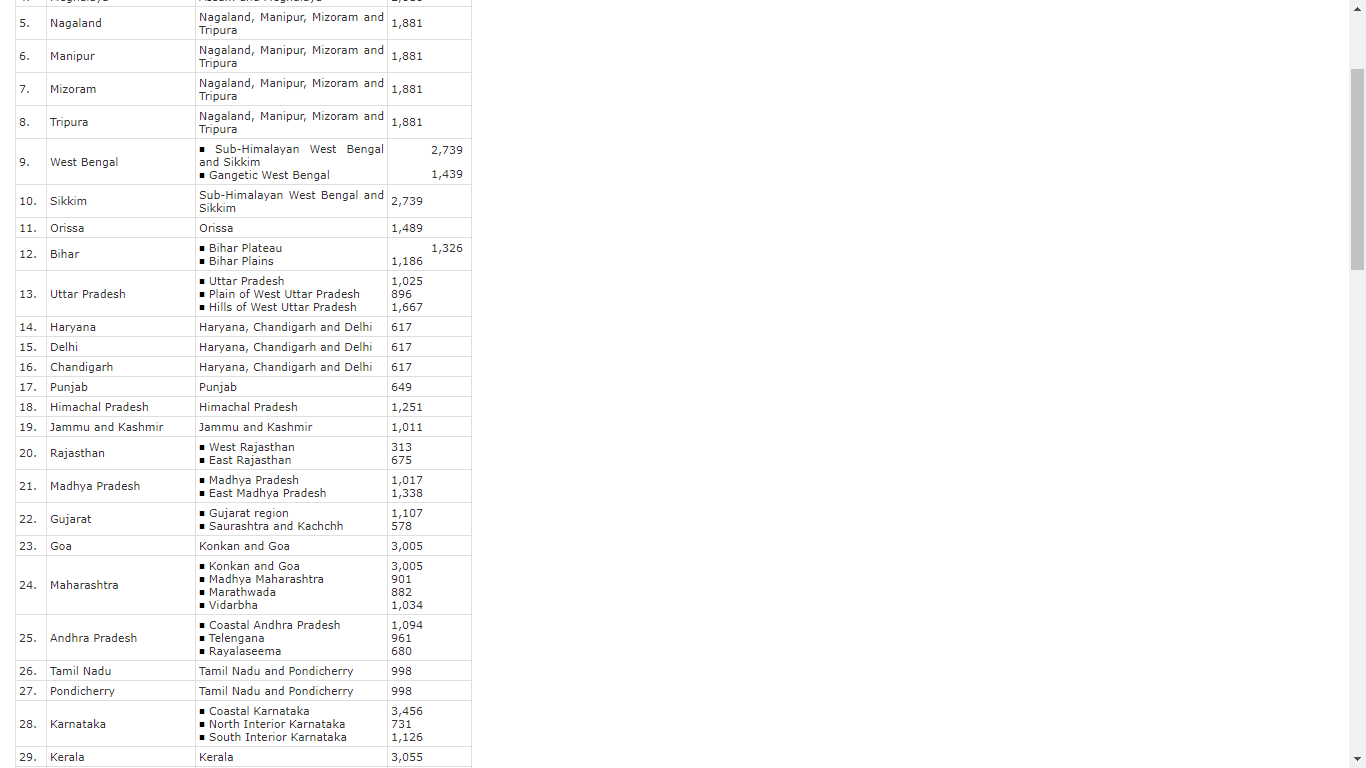


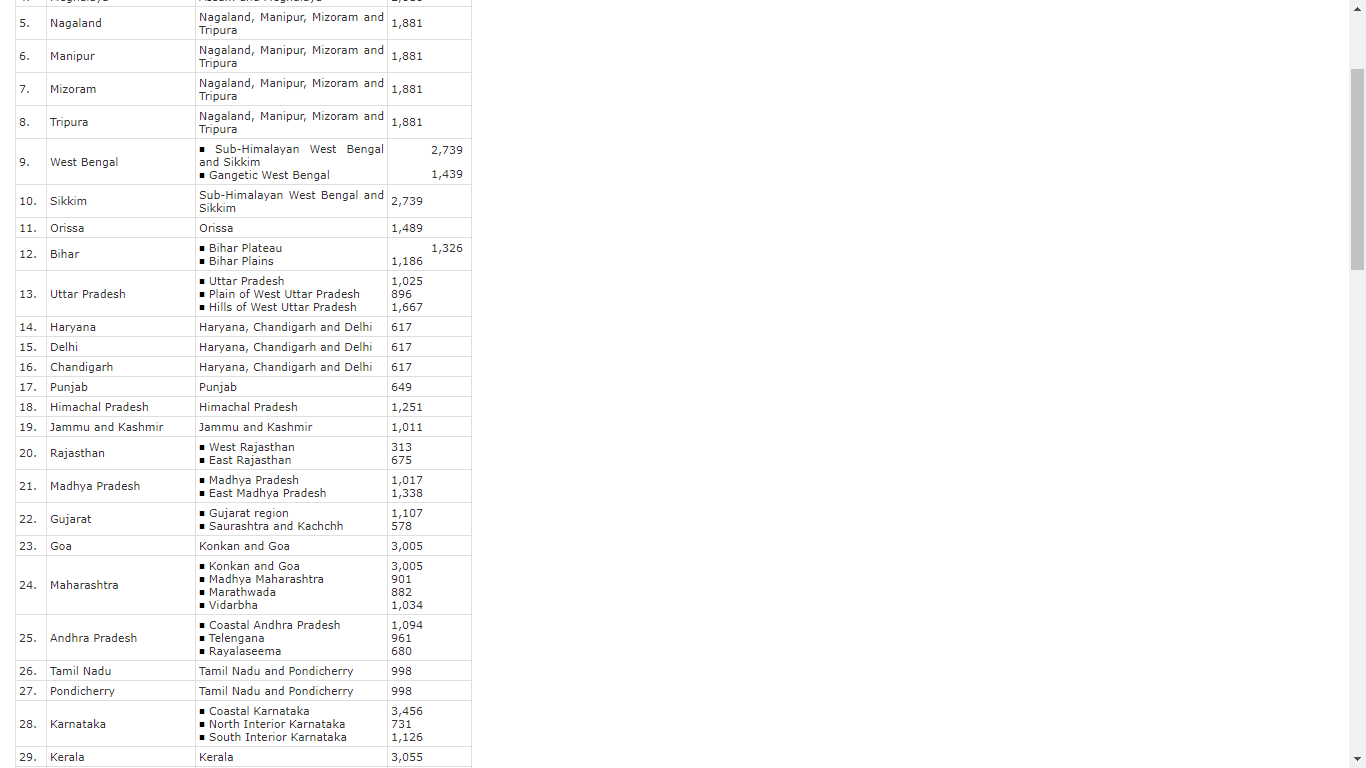

### Renaming the columns of reservoir level data to avoid any kind of error

In [ ]:
df2.rename(columns={"POONDI":"POON_R", "CHOLAVARAM":"CHOLA_R", "REDHILLS":"RED_R","CHEMBARAMBAKKAM":
                   "CHEM_R"}, inplace=True)

In [ ]:
df2.head()

In [ ]:
df2.rename(columns={"Date":"Dates"}, inplace=True)

In [ ]:
df2.columns

In [ ]:
df2["Dates"]= pd.to_datetime(df.Dates)

In [ ]:
df_merged= pd.merge(df,df2,on="Dates")

In [ ]:
df_merged.head()

In [ ]:
df_merged["total_rain_lev"]= df_merged.POONDI + df_merged.CHOLAVARAM + df_merged.REDHILLS + df_merged.CHEMBARAMBAKKAM

df_merged["total_res_lev"]= df_merged.POON_R + df_merged.CHOLA_R + df_merged.RED_R + df_merged.CHEM_R

In [ ]:
df_merged

In [ ]:
df_merged.iplot(x="year", y="total_res_lev", title="reservoir level in mcft for different years", mode="lines")

#### Above it can be seen that there is a decrease in the reservoir level over the years due to over exploitation of water and other climatic and non climatic factors. If this continues to prevail then the major sources of water for Chennai will be empty.